In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report
import os

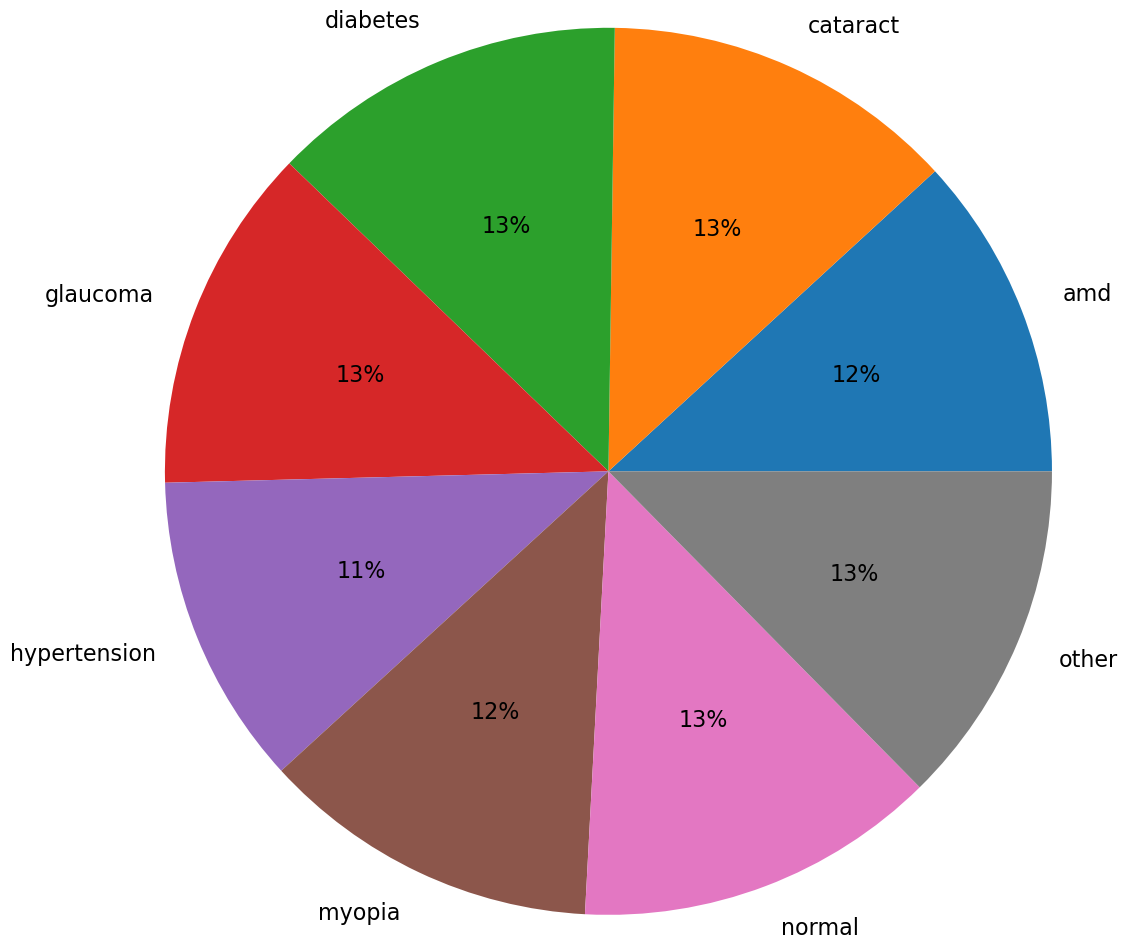

In [2]:
x = np.array([len(os.listdir('/kaggle/input/original-data-set-project/amd')),len(os.listdir('/kaggle/input/original-data-set-project/cataract')),len(os.listdir('/kaggle/input/original-data-set-project/diabetes')),
              len(os.listdir('/kaggle/input/original-data-set-project/glaucoma')),len(os.listdir('/kaggle/input/original-data-set-project/hypertension')),len(os.listdir('/kaggle/input/original-data-set-project/myopia')),
              len(os.listdir('/kaggle/input/original-data-set-project/normal')),len(os.listdir('/kaggle/input/original-data-set-project/other'))])
labels = ['amd', 'cataract', 'diabetes', 'glaucoma', 'hypertension', 'myopia', 'normal', 'other']

plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 3, textprops={'fontsize': 16})
plt.show()

In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import splitfolders
basic_data = '/kaggle/input/original-data-set-project'
splitfolders.ratio(basic_data , output = "new_dataset" , seed=1 , ratio=(0.8,0.1,0.1) , group_prefix=None)

Copying files: 60464 files [05:17, 190.51 files/s]


In [5]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.0 MB/s eta 0:00:00


In [6]:
import efficientnet.keras as effnet

In [7]:
base_model = effnet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

16804768/16804768 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 32  128         ['stem_conv[0][0]']              
                                )                                                             

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory( '/kaggle/working/new_dataset/train',
                                                    target_size=(299,299),
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory('/kaggle/working/new_dataset/val',
                                                              target_size=(299 , 299),
                                                              batch_size=32, 
                                                              class_mode='categorical')

Found 48368 images belonging to 8 classes.
Found 6043 images belonging to 8 classes.


In [11]:
opt= tf.keras.optimizers.experimental.SGD(learning_rate=0.01, momentum=0.9, nesterov = True)

In [12]:
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, 
          steps_per_epoch = len(train_generator),
          epochs = 20,          
          validation_data=validation_generator, 
          validation_steps = len(validation_generator))

Epoch 1/20


2023-04-17 06:15:28.694619: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1512/1512 [==============================] - 1421s 924ms/step - loss: 0.9270 - accuracy: 0.6482 - val_loss: 0.6768 - val_accuracy: 0.7412
Epoch 2/20
1512/1512 [==============================] - 1387s 917ms/step - loss: 0.5271 - accuracy: 0.7941 - val_loss: 0.4776 - val_accuracy: 0.8135
Epoch 3/20
1512/1512 [==============================] - 1383s 914ms/step - loss: 0.3697 - accuracy: 0.8578 - val_loss: 0.5754 - val_accuracy: 0.7855
Epoch 4/20
1512/1512 [==============================] - 1371s 906ms/step - loss: 0.2750 - accuracy: 0.8911 - val_loss: 0.2868 - val_accuracy: 0.8908
Epoch 5/20
1512/1512 [==============================] - 1388s 918ms/step - loss: 0.2155 - accuracy: 0.9161 - val_loss: 0.2613 - val_accuracy: 0.8959
Epoch 6/20
1512/1512 [==============================] - 1399s 925ms/step - loss: 0.1756 - accuracy: 0.9323 - val_loss: 0.1737 - val_accuracy: 0.9264
Epoch 7/20
1512/1512 [==============================] - 1396s 923ms/step - loss: 0.1432 - accuracy: 0.9453 - val_loss

In [14]:
history = model.fit(train_generator, 
          steps_per_epoch = len(train_generator),
          epochs = 2,          
          validation_data=validation_generator, 
          validation_steps = len(validation_generator))

Epoch 1/2
1512/1512 [==============================] - 1417s 937ms/step - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.0613 - val_accuracy: 0.9805
Epoch 2/2
1512/1512 [==============================] - 1415s 936ms/step - loss: 0.0236 - accuracy: 0.9916 - val_loss: 0.0416 - val_accuracy: 0.9853


In [15]:
model.evaluate(
validation_generator)

189/189 [==============================] - 54s 287ms/step - loss: 0.0416 - accuracy: 0.9853


[0.0416400171816349, 0.985272228717804]

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/kaggle/working/new_dataset/test',
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 6053 images belonging to 8 classes.


In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('test accuracy:',test_acc )
print('test loss:',test_loss)

190/190 [==============================] - 56s 289ms/step - loss: 0.0362 - accuracy: 0.9886
test accuracy: 0.9886006712913513
test loss: 0.036183297634124756


In [18]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from sklearn.metrics import roc_auc_score

In [19]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [20]:
Predections = model.predict(test_generator,steps=test_steps_per_epoch)

190/190 [==============================] - 57s 288ms/step


In [21]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
class_labels

['amd',
 'cataract',
 'diabetes',
 'glaucoma',
 'hypertension',
 'myopia',
 'normal',
 'other']

In [22]:
predicted_classes = np.argmax(Predections, axis=1)
predicted_classes

array([0, 0, 0, ..., 7, 7, 7])

In [23]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

         amd       1.00      1.00      1.00       716
    cataract       1.00      1.00      1.00       784
    diabetes       0.97      0.98      0.97       788
    glaucoma       1.00      1.00      1.00       764
hypertension       1.00      1.00      1.00       689
      myopia       1.00      1.00      1.00       748
      normal       0.97      0.95      0.96       801
       other       0.98      0.99      0.98       763

    accuracy                           0.99      6053
   macro avg       0.99      0.99      0.99      6053
weighted avg       0.99      0.99      0.99      6053



In [24]:
cm=confusion_matrix(true_classes, predicted_classes)
print(cm)

[[716   0   0   0   0   0   0   0]
 [  0 784   0   0   0   0   0   0]
 [  0   0 770   0   2   0  15   1]
 [  0   0   0 761   0   0   1   2]
 [  0   0   0   0 689   0   0   0]
 [  0   0   0   0   0 748   0   0]
 [  1   0  23   2   1   0 758  16]
 [  0   0   1   0   0   0   4 758]]


Text(0.5, 1.0, 'Confusion Matrix')

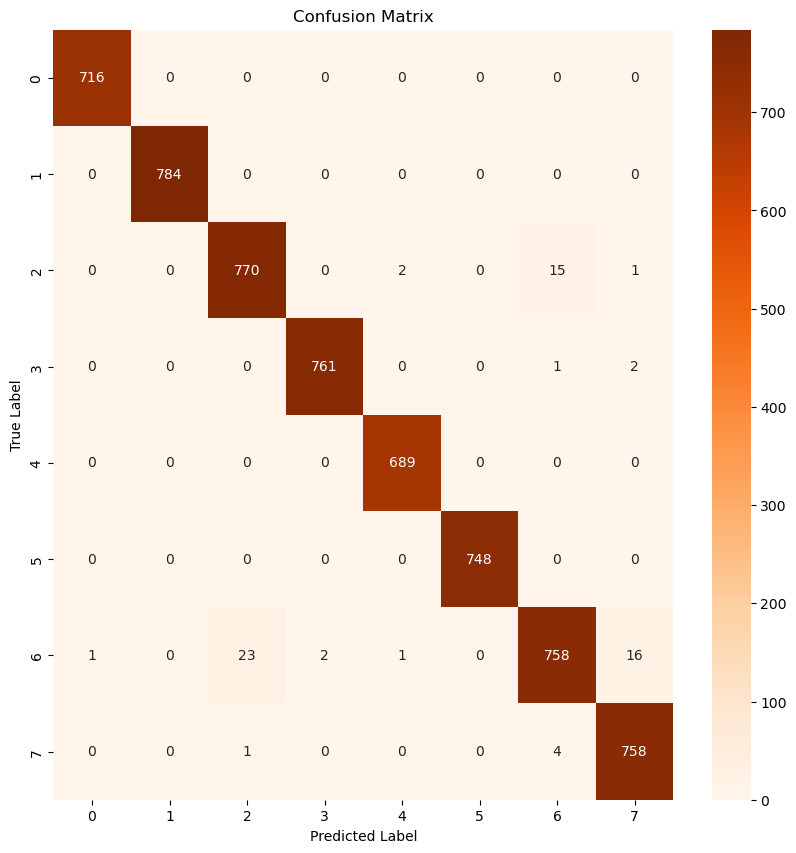

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax)

# Add axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [26]:
model.save('mode23.h5')